---
## Web Scraper + Seaborb Visualizations

### Link to scraping-site : https://bit.ly/3hkuADS
---
### Description :
* Scraping the web using the BeautifulSoup Libray.
* The scraped data is the weather forecast of New Delhi.
* Data contains various parameters all scraped from the same site.
* Running this notebook, collects all the info of the next 14 days.
* After scraping, few more columns have been added for ease of use.
* Once feature engineering is over, the data is visualized using Seaborn.

### Importing modules :

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('turbo', n_colors=18)
from datetime import datetime as dt
import calendar as cl
print('Importing Done!')

Importing Done!


### Linking site with soup :

In [2]:
url='https://bit.ly/3hkuADS'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [3]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.Tag]

### Scraping Temperature separately :

In [4]:
TempHighList = []

spanListHigh = list(soup.find_all(class_='DetailsSummary--highTempValue--3x6cL'))
for spanItemHigh in spanListHigh:
    for spanTempHigh in spanItemHigh:
        if spanTempHigh=='--':
            print('Waiting for Mean!')
        else:
            TempHighList.append(int(spanTempHigh[:2]))
s = 0   
for x in TempHighList:
    s += x
    mean = s/len(TempHighList)
TempHighList.insert(0,int(mean))
print(TempHighList)

Waiting for Mean!
[37, 36, 38, 40, 39, 32, 32, 35, 35, 37, 39, 40, 40, 40, 40]


In [5]:
TempLowList = []

spanListLow = list(soup.find_all(class_='DetailsSummary--lowTempValue--1DlJK'))
for spanItemLow in spanListLow:
    for spanTempLow in spanItemLow:
        TempLowList.append(int(spanTempLow[:2]))

print(TempLowList)

[24, 25, 27, 28, 29, 25, 25, 24, 26, 27, 27, 28, 27, 28, 28]


### Scraping Days and Dates :

In [6]:
dayDate = []

dayName = list(soup.find_all(class_='DetailsSummary--daypartName--1Mebr'))
for dayItem in dayName:
    for dayDetail in dayItem:
        dayDate.append(dayDetail)
for day in dayDate:
    print(day, end=', ')

Tonight, Fri 14, Sat 15, Sun 16, Mon 17, Tue 18, Wed 19, Thu 20, Fri 21, Sat 22, Sun 23, Mon 24, Tue 25, Wed 26, Thu 27, 

### Converting 'Today' to required format :

In [7]:
today = dt.now().date()
today_date = dt.now().day
d = dt.strptime(str(today), '%Y-%m-%d').weekday()
day_name = cl.day_name[d]
short_day_name = day_name[:3]
today_day_date = (short_day_name + ' ' + str(today_date))
print(today_day_date)

Thu 13


In [8]:
dayDate[0] = today_day_date
dayDate[0]

'Thu 13'

In [9]:
for date in dayDate:
    print(date, end=', ')

Thu 13, Fri 14, Sat 15, Sun 16, Mon 17, Tue 18, Wed 19, Thu 20, Fri 21, Sat 22, Sun 23, Mon 24, Tue 25, Wed 26, Thu 27, 

In [10]:
dates = []
days = []

for item in dayDate:
    for i in range(len(item)):
        if item[i] == ' ':
            dates.append(int(item[i+1:]))
            days.append(item[:i])
print(dates)
print(days)

[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']


### Scraping Humidity separately :

In [11]:
perc = list(soup.find_all(class_='DetailsTable--value--1F3Ze'))
cluster = []
nightHum = []
dayHum = []
for item in perc:
    for i in item:
        for c in range(len(i)):
            if i[c]=='%':
                num = i[:c]
                cluster.append(int(num))

for n in range(len(cluster)):
    if n%2==0:
        nightHum.append(int(cluster[n]))
    else:
        dayHum.append(int(cluster[n]))
print(cluster)
print(nightHum)
print(dayHum)

[61, 47, 49, 37, 44, 30, 36, 28, 36, 47, 62, 59, 72, 58, 68, 57, 63, 48, 55, 39, 45, 35, 40, 33, 38, 30, 37, 30, 38]
[61, 49, 44, 36, 36, 62, 72, 68, 63, 55, 45, 40, 38, 37, 38]
[47, 37, 30, 28, 47, 59, 58, 57, 48, 39, 35, 33, 30, 30]


### Scraping WindSpeed :

In [12]:
w = list(soup.find_all(class_='Wind--windWrapper--1Va1P undefined'))
windList = []
for item in w:
    for wind in item:
        for num in range(len(wind)):
            if wind[num].isdigit():
                if wind[num+1] != ' ':
                    windList.append(int(wind[num]+wind[num+1]))
print(windList)


[10, 13, 10, 10, 14, 15, 16, 18, 18, 21, 20, 18, 18, 18, 17]


In [13]:
print(TempHighList)
print(TempLowList)
print(dates)
print(days)
print(windList)
print(dayHum)
print(nightHum)

[37, 36, 38, 40, 39, 32, 32, 35, 35, 37, 39, 40, 40, 40, 40]
[24, 25, 27, 28, 29, 25, 25, 24, 26, 27, 27, 28, 27, 28, 28]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']
[10, 13, 10, 10, 14, 15, 16, 18, 18, 21, 20, 18, 18, 18, 17]
[47, 37, 30, 28, 47, 59, 58, 57, 48, 39, 35, 33, 30, 30]
[61, 49, 44, 36, 36, 62, 72, 68, 63, 55, 45, 40, 38, 37, 38]


In [14]:
info = list(soup.select('span.DetailsSummary--extendedData--aaFeV'))
infoList = []
for item in info:
    for content in item:
        infoList.append(content)
print(infoList)

['Partly Cloudy', 'Partly Cloudy', 'Mostly Sunny', 'Mostly Sunny', 'Partly Cloudy', 'Showers', 'Showers', 'Partly Cloudy', 'Partly Cloudy', 'Mostly Sunny', 'Sunny', 'Sunny', 'Sunny', 'Mostly Sunny', 'Mostly Sunny']


In [15]:
df = pd.DataFrame(list(zip(days, dates, TempHighList, TempLowList, windList, dayHum, nightHum, infoList)), 
                          columns =['Days', 'Dates', 'HighestTemp', 'LowestTemp', 'WindSpeed', 'DayHumidity', 'NightHumidity',
                                    'Description'])
df

,Days,Dates,HighestTemp,LowestTemp,WindSpeed,DayHumidity,NightHumidity,Description
0,Thu,13,37,24,10,47,61,Partly Cloudy
1,Fri,14,36,25,13,37,49,Partly Cloudy
2,Sat,15,38,27,10,30,44,Mostly Sunny
3,Sun,16,40,28,10,28,36,Mostly Sunny
4,Mon,17,39,29,14,47,36,Partly Cloudy
5,Tue,18,32,25,15,59,62,Showers
6,Wed,19,32,25,16,58,72,Showers
7,Thu,20,35,24,18,57,68,Partly Cloudy
8,Fri,21,35,26,18,48,63,Partly Cloudy
9,Sat,22,37,27,21,39,55,Mostly Sunny


### Adding new columns for better understanding :

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Days           14 non-null     object
 1   Dates          14 non-null     int64 
 2   HighestTemp    14 non-null     int64 
 3   LowestTemp     14 non-null     int64 
 4   WindSpeed      14 non-null     int64 
 5   DayHumidity    14 non-null     int64 
 6   NightHumidity  14 non-null     int64 
 7   Description    14 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.0+ KB


In [17]:
AverageTemp = []
for i in range(len(df['HighestTemp'])):
    h_sum = df['HighestTemp'][i]
    l_sum = df['LowestTemp'][i]
    avg_temp = int((h_sum + l_sum)/2)
    AverageTemp.append(avg_temp)
AverageTemp = pd.DataFrame(AverageTemp)
df.insert(loc=4, column='AverageTemp', value=AverageTemp)
df.head()

,Days,Dates,HighestTemp,LowestTemp,AverageTemp,WindSpeed,DayHumidity,NightHumidity,Description
0,Thu,13,37,24,30,10,47,61,Partly Cloudy
1,Fri,14,36,25,30,13,37,49,Partly Cloudy
2,Sat,15,38,27,32,10,30,44,Mostly Sunny
3,Sun,16,40,28,34,10,28,36,Mostly Sunny
4,Mon,17,39,29,34,14,47,36,Partly Cloudy


In [18]:
AverageHum = []
for i in range(len(df['DayHumidity'])):
    d_hum = df['DayHumidity'][i]
    n_hum = df['NightHumidity'][i]
    avg_hum = int((d_hum + n_hum)/2)
    AverageHum.append(avg_hum)
AverageHum = pd.DataFrame(AverageHum)
df.insert(loc=8, column='AvgHumidity', value=AverageHum)
df.head()

,Days,Dates,HighestTemp,LowestTemp,AverageTemp,WindSpeed,DayHumidity,NightHumidity,AvgHumidity,Description
0,Thu,13,37,24,30,10,47,61,54,Partly Cloudy
1,Fri,14,36,25,30,13,37,49,43,Partly Cloudy
2,Sat,15,38,27,32,10,30,44,37,Mostly Sunny
3,Sun,16,40,28,34,10,28,36,32,Mostly Sunny
4,Mon,17,39,29,34,14,47,36,41,Partly Cloudy


In [19]:
numeric_df = df.filter(['Dates','AverageTemp',
                        'WindSpeed','AvgHumidity'], axis=1)
numeric_df.head()

,Dates,AverageTemp,WindSpeed,AvgHumidity
0,13,30,10,54
1,14,30,13,43
2,15,32,10,37
3,16,34,10,32
4,17,34,14,41


In [20]:
temp_df = df.filter(['HighestTemp','LowestTemp','AverageTemp'], axis=1)
temp_df.head()

,HighestTemp,LowestTemp,AverageTemp
0,37,24,30
1,36,25,30
2,38,27,32
3,40,28,34
4,39,29,34


In [21]:
hum_df = df.filter(['DayHumidity','NightHumidity','AvgHumidity'], axis=1)
hum_df.head()

,DayHumidity,NightHumidity,AvgHumidity
0,47,61,54
1,37,49,43
2,30,44,37
3,28,36,32
4,47,36,41


### Visualizing the data with Seaborn :

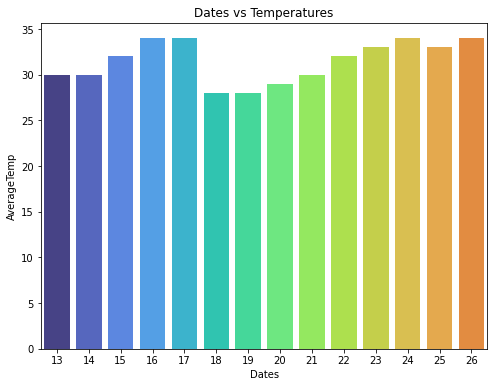

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Dates', y='AverageTemp')
plt.title('Dates vs Temperatures')
plt.show()

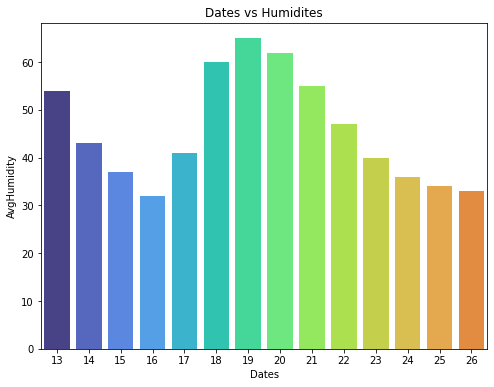

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Dates', y='AvgHumidity')
plt.title('Dates vs Humidites')
plt.show()

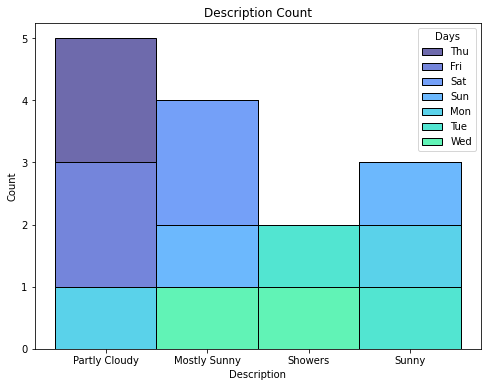

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Description', hue='Days', multiple='stack')
plt.title('Description Count')
plt.show()

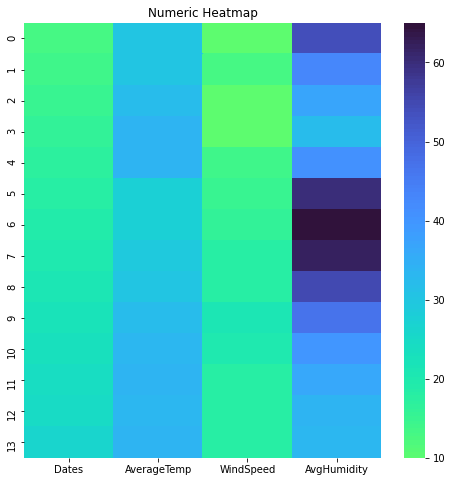

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(data=numeric_df, center=0, cmap='turbo_r')
plt.title('Numeric Heatmap')
plt.show()

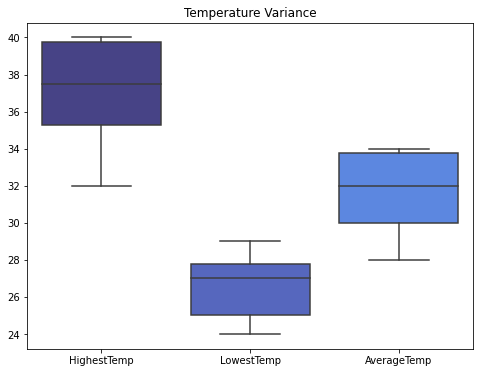

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(data=temp_df)
plt.title('Temperature Variance')
plt.show()

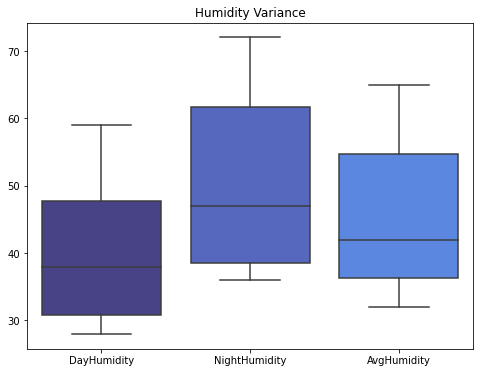

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=hum_df)
plt.title('Humidity Variance')
plt.show()

### Conclusion :
* Visualizations help us understand the trends in various factors.
* With that, one can also understand how factors directly impact the end result.
* Hence, the Weather-Scraper does as it says with an addition of visualizations.